In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import warnings
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



### *Here, we are importing the pandas. Pandas is a Python library used for easily storing, analyzing, and manipulating data—especially tables like spreadsheets or CSV files.*

In [37]:
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\ML_CLASSIFIER_PROJECT\data\nlp_processed_reviews_filtered.csv')

### *First, we load the data and we got the value count for our sentiment features.*

In [38]:
df.head()

,cleaned_text,sentiment
0,nice app,POSITIVE
1,good internet,POSITIVE
2,geda jasto net muji 100mbps net cha solo chala...,NEGATIVE
3,wow,POSITIVE
4,useless appdevice filter option shows error ev...,NEGATIVE


In [39]:
df.sentiment.value_counts(normalize=True)

sentiment
NEGATIVE    0.548703
POSITIVE    0.451297
Name: proportion, dtype: float64

### *This table shows the proportion of each sentiment in the dataset. About 54.87% of the reviews are NEGATIVE, while 45.13% are POSITIVE, meaning the dataset is slightly imbalanced with more negative reviews than positive ones.*

### *Although the dataset is slightly imbalanced, the difference is small enough that it does not significantly affect the model's performance.*

Text(0.5, 1.0, 'Sentiment Distribution')

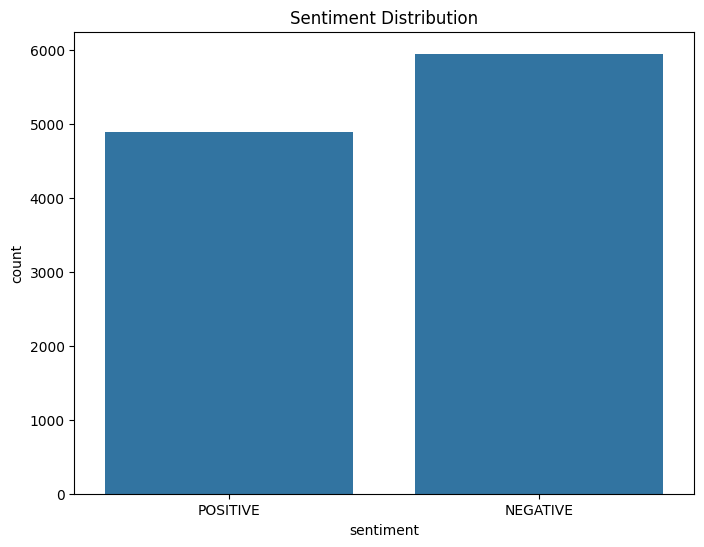

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')

### *Plotting the sentiment distribution*

### *Here, In bar chart, we have plotted the total number of positive and negative sentiment.*

<Axes: ylabel='count'>

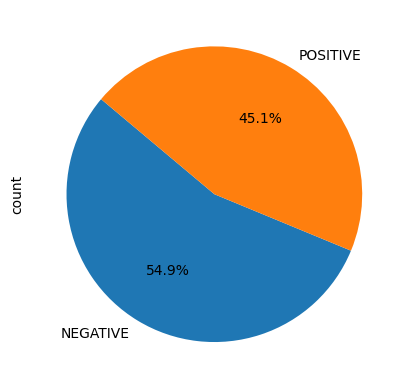

In [41]:
df.sentiment.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)

In [42]:
%pip install nltk




Note: you may need to restart the kernel to use updated packages.


### *We are installing the NLTK library for further word extraction.*

In [43]:
features_to_use = df.columns.tolist()
features_to_use

['cleaned_text', 'sentiment']

### *We are storing the features in the form of list.*

In [44]:
df.dtypes

cleaned_text    object
sentiment       object
dtype: object

## *Here, we are checking the data types of our features.*

In [45]:
def get_top_ngrams(corpus, n=None):
    # Replace NaN with empty strings
    corpus = corpus.fillna("")

    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

#  Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['cleaned_text'], 25)

#  Convert to DataFrame
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])
print(top_25_bigrams_df.head())


             bigram  count
0        world link    348
1    worst internet    201
2  internet service    188
3         worst app    183
4          good app    183


### *From the above, it is clear that the most used bigrams are 'worst internet', (word-count='201)', 'internet service', (word-count'188)', 'worst app',( word-count='183'), 'good app', (word-count='183') which is a matter of concern since it resembles negative feedbacks.*

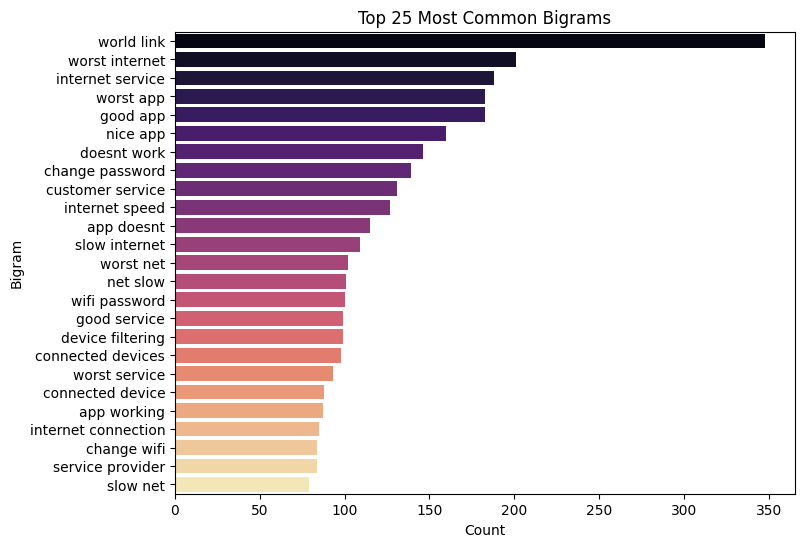

In [46]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,6))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

### *Here, we are extracting the most frequently used bigrams (two-word combinations). Out of the top 25 common bigrams, four of them are true positives, and the remaining ones are negative or contain suggestions.*

In [47]:
def get_top_ngrams(corpus, n=None):
    # Replace NaN with empty strings
    corpus = corpus.fillna("")

    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

#  Get the top 25 bigrams
top_25_Tigrams = get_top_ngrams(df['cleaned_text'], 25)

#  Convert to DataFrame
top_25_Tigrams_df = pd.DataFrame(top_25_Tigrams, columns=['Tigram', 'count'])
print(top_25_Tigrams_df.head())


                      Tigram  count
0       change wifi password     58
1     worst internet service     53
2            app doesnt work     42
3  internet service provider     40
4       doesnt work properly     32


### *we are similarly looking for tigrams (three words combo) as well.*

### *These trigrams show that the words are mostly related to problems faced by users, indicating that they are not satisfied with the service provided. The most commonly used trigrams are “change wifi password” (word count = 58), “worst internet service” (word count = 53), and “app doesn't work” (word count = 42).*

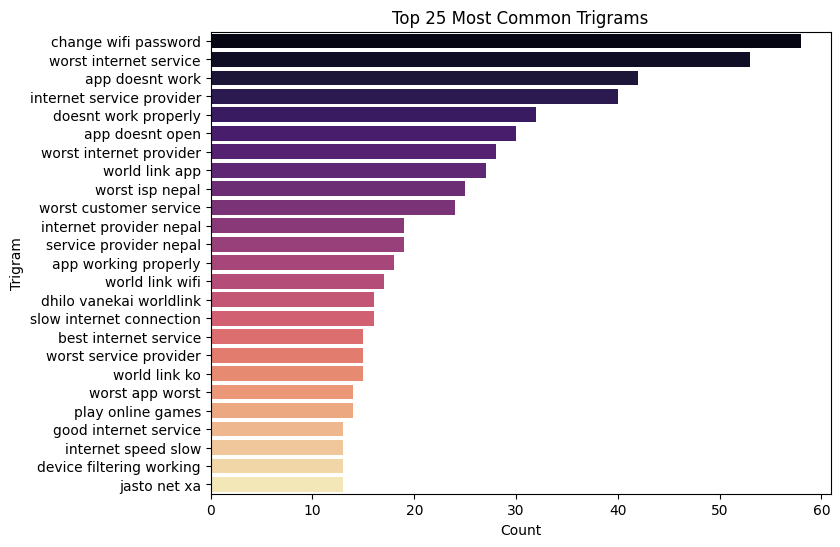

<Figure size 640x480 with 0 Axes>

In [48]:
figure = plt.figure(figsize=(8,6))
sns.barplot(data=top_25_Tigrams_df, x='count', y='Tigram', palette='magma')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()
plt.tight_layout()

### *Here, we are extracting the most frequently used tigrams (three-word combo). Out of the top 25 common bigrams, three of them are true positives, and the remaining ones are negative or contain suggestions.*

### *The feedbacks are mostly negative and users are complaining about the service.*

In [49]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### *Here, we are installing Wordcloud. A word cloud is used to quickly visualize the most frequently used words in text data, helping identify common topics or issues at a glance.*

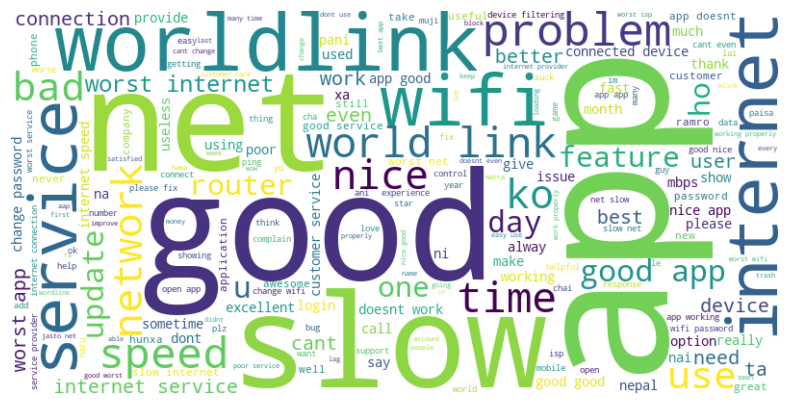

In [50]:
def plot_word_cloud(text_series):
    # Ensure all items are strings and remove NaN
    text = ' '.join(text_series.dropna().astype(str))
    
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white'
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Example call
plot_word_cloud(df['cleaned_text'])


### *Here, we are visualizing the talked about words.*

### *Above, figure signifies that frequently mentioned words like “good,” “slow,” “internet,” and “service” reflect mixed user opinions about app performance and network quality.*

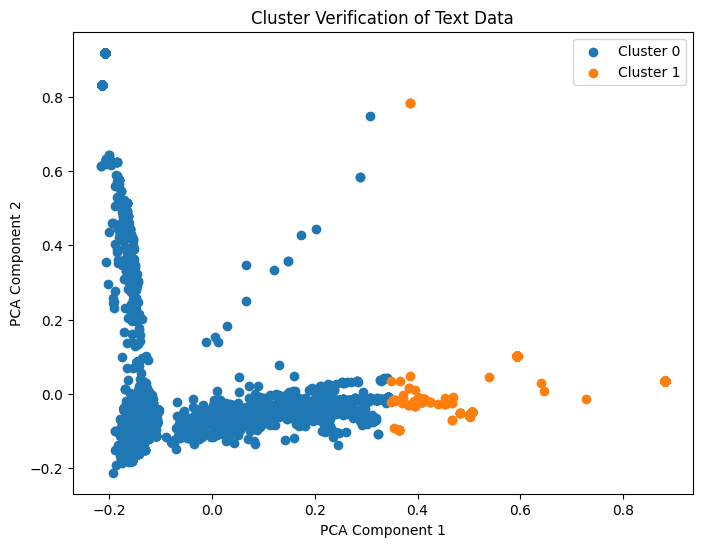

In [51]:

# Step 1: Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(df['cleaned_text'].fillna(""))

# Step 2: Dimensionality Reduction
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Step 3: Clustering
n_clusters = 2  # You can change this based on your data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Step 4: Visualization
plt.figure(figsize=(8,6))
for i in range(n_clusters):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')
plt.title('Cluster Verification of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()



### *Here, we are implementing k-means clustering to divide the sentiments into groups.*

### *This scatter plot titled “Cluster Verification of Text Data” represents the visualization of clustered sentiment data (most likely positive vs. negative sentiment) using PCA (Principal Component Analysis) for dimensionality reduction.*
--🟦 Cluster 0: Could represent negative or neutral reviews.

--🟧 Cluster 1: Could represent positive reviews.

[INFO] Loading cleaned reviews...
[INFO] Final dataset size: 10825
[INFO] Splitting dataset (80/20 train/test)...

[VECTORIZER] Fitting TF-IDF...

[MODEL] Training Logistic Regression...

 Training Complete. Model Metrics on Test Set:
→ Accuracy: 91.73%
→ Log Loss: 0.2018

[CONFUSION MATRIX]


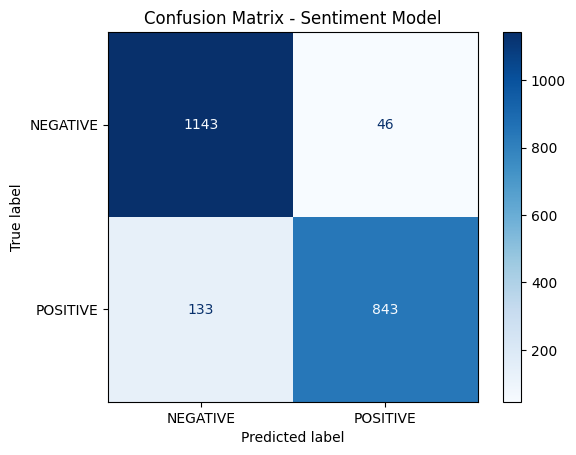


 Model saved to: models\best_sentiment_model.pkl
 Vectorizer saved to: models\tfidf_vectorizer.pkl


In [ ]:


VECTORIZER_PATH = os.path.join("models", "tfidf_vectorizer.pkl")

def train_sentiment_model():
    """Train sentiment classification model using Logistic Regression only."""

    print("[INFO] Loading cleaned reviews...")
    df = pd.read_csv(r'C:\Users\Lenovo\Downloads\ML_CLASSIFIER_PROJECT\data\nlp_processed_reviews_filtered.csv')
    if df.empty:
        print("[ERROR] No clean reviews found for training!")
        return

    # Clean up and prepare data
    df = df.dropna(subset=["cleaned_text", "sentiment"])
    df["cleaned_text"] = df["cleaned_text"].astype(str)
    df = df[df["cleaned_text"].str.strip() != ""]
    df = df.reset_index(drop=True)

    # Encode sentiment (POSITIVE: 1, NEGATIVE: 0)
    if df["sentiment"].dtype == object:
        df["sentiment"] = df["sentiment"].map({"POSITIVE": 1, "NEGATIVE": 0}).fillna(0).astype(int)

    print(f"[INFO] Final dataset size: {len(df)}")
    print("[INFO] Splitting dataset (80/20 train/test)...")
    
    X = df["cleaned_text"]
    y = df["sentiment"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # --- TF-IDF Vectorization ---
    print("\n[VECTORIZER] Fitting TF-IDF...")
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # --- Train Logistic Regression ---
    print("\n[MODEL] Training Logistic Regression...")
    model = LogisticRegression(
        max_iter=1000,
        solver='liblinear',
        C=2.0,
        penalty='l2',
        random_state=42
    )

    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    lloss = None
    try:
        y_proba = model.predict_proba(X_test_vec)
        lloss = log_loss(y_test, y_proba)
    except Exception:
        pass

    print(f"\n Training Complete. Model Metrics on Test Set:")
    print(f"→ Accuracy: {acc * 100:.2f}%")
    print(f"→ Log Loss: {lloss:.4f}" if lloss else "→ Log Loss: N/A")

    # --- Confusion Matrix ---
    print("\n[CONFUSION MATRIX]")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NEGATIVE", "POSITIVE"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix - Sentiment Model")
    plt.show()

    # Save model and vectorizer
    os.makedirs("models", exist_ok=True)
    
    with open(MODEL_PATH, "wb") as f:
        pickle.dump(model, f)
    with open(VECTORIZER_PATH, "wb") as f:
        pickle.dump(vectorizer, f)
        
    print(f"\n Model saved to: {MODEL_PATH}")
    print(f" Vectorizer saved to: {VECTORIZER_PATH}")


if __name__ == "__main__":
    train_sentiment_model()


### *Here, we are plotting the confusion matrix.*

### *This image shows a confusion matrix for a sentiment analysis model, indicating strong performance with 1,143 true negatives, 843 true positives, 46 false positives, and 133 false negatives.*

